<a href="https://colab.research.google.com/github/alibekk93/IDP_analysis/blob/RAPID/notebooks/06_quasi_contrast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LS quasi-contrast study

## Setup

In [ ]:
!pip install BIO
!sudo apt install clustalw
# !pip install toytree toyplot
!git clone -b RAPID https://github.com/alibekk93/IDP_analysis
!cd /content/IDP_analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  clustalx seaview
The following NEW packages will be installed:
  clustalw
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 275 kB of archives.
After this operation, 818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalw amd64 2.1+lgpl-7 [275 kB]
Fetched 275 kB in 1s (268 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling t

In [ ]:
from IDP_analysis.packages_import import *
from IDP_analysis.idp_in_bacteria_functions import *

/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
sns.set_theme(context='paper', style='white',  palette='colorblind')

Loading Tempura dataset

In [ ]:
# tempura = pd.read_csv('/content/IDP_analysis/datafiles/tempura/200617_TEMPURA.csv', index_col=0)
# tempura = pd.read_csv('/content/IDP_analysis/datafiles/tempura/tempura_bacteria_uniprot.csv', index_col=0)
tempura = pd.read_csv('/content/IDP_analysis/datafiles/tempura/tempura_filtered.csv', index_col=0)

Only keeping bacteria with available assembly or accession numbers

In [ ]:
# tempura = tempura[tempura['superkingdom']=='Bacteria']
# tempura.dropna(subset='assembly_or_accession', inplace=True)
# tempura.reset_index(drop=True, inplace=True)

Classifying bacteria into groups:
1. Psychrophile: OGT <= 20
2. Mesophile: 20 < OGT <= 40
2. Thermophile: 40 < OGT

While this may be quite liberal, some "psychrohiles" with OGT = 20 have *antarctica* in their species name, so it should be fair enough

In [ ]:
tempura['group'] = pd.cut(tempura['Topt_ave'], bins=[-float('inf'), 20, 40, float('inf')],
                          labels=['psychrophilic', 'mesophilic', 'thermophilic'])

Loading all_proteins

In [ ]:
%cd /content/IDP_analysis/datafiles/split_files/
!cat all_proteins.zip.001 all_proteins.zip.002 all_proteins.zip.003 > all_proteins.zip
!unzip all_proteins.zip
!cat all_proteins_filtered.zip.001 all_proteins_filtered.zip.002 all_proteins_filtered.zip.003 > all_proteins_filtered.zip
!unzip all_proteins_filtered.zip
!cat all_proteins_rapid.zip.001 all_proteins_rapid.zip.002 all_proteins_rapid.zip.003 > all_proteins_rapid.zip
!unzip all_proteins_rapid.zip
!cat all_proteins_types.zip.001 all_proteins_types.zip.002 all_proteins_types.zip.003 > all_proteins_types.zip
!unzip all_proteins_types.zip
%cd ../../..

In [ ]:
# all_proteins = pd.read_csv('IDP_analysis/datafiles/split_files/all_proteins.csv', index_col=0)
# all_proteins = pd.read_csv('IDP_analysis/datafiles/split_files/all_proteins_filtered.csv', index_col=0)
# all_proteins = pd.read_csv('IDP_analysis/datafiles/split_files/all_proteins_rapid.csv', index_col=0)
all_proteins = pd.read_csv('IDP_analysis/datafiles/split_files/all_proteins_types.csv', index_col=0)

Merging all_proteins with temura

In [ ]:
all_protein_tempura = all_proteins_rapid.merge(tempura, left_on='Species', right_on='genus_and_species')
all_protein_tempura_idp = all_proteins_disordered.merge(tempura, left_on='Species', right_on='genus_and_species')

Loading cluster dataframes

In [ ]:
interesting_clusters = pd.read_csv('/content/IDP_analysis/datafiles/clusters/interesting_clusters.csv', index_col=0)
disordered_clusters = pd.read_csv('/content/IDP_analysis/datafiles/clusters/disordered_clusters.csv', index_col=0)

Loading RAPID_disorder values

In [ ]:
# rapid_disorder_values = pd.read_csv('/content/IDP_analysis/datafiles/RAPID/RAPID_disorder_values.csv', index_col=0)

## Getting 16s sequences

Download nt sequences for 16s genes of all species and save as `fasta` files

In [ ]:
# # Set your email address
# Entrez.email = 'akrug104@uottawa.ca'

# # Get the list of accession numbers and species names
# accession_list = tempura['16S_accssion'].tolist()
# species_list = tempura['genus_and_species'].tolist()

# # Add outgroup
# accession_list.append('NG_046384.1')
# species_list.append('Pyrobaculum ferrireducens')

# # Fetch the sequences from NCBI
# handle = Entrez.efetch(db='nucleotide', id=accession_list, rettype='fasta', retmode='text')
# records = list(SeqIO.parse(handle, 'fasta'))

# # Filter the records to only allow sequences up to 5000 nt long
# records = [r for r in  records if len(r.seq) <= 5000]

# # Save the sequences to a single fasta file
# with open('16S_all.fasta', 'w') as output_handle:
#     SeqIO.write(records, output_handle, 'fasta')

A sequence from an archaea was added as outgroup (NG_046384.1 of *Pyrobaculum ferrireducens*)

Alignment of sequences was done externally using MAFFT with default parameters except for specification for nucleotide sequences

## Tree building

In [ ]:
# # Read the fasta file
# records = SeqIO.parse('/content/16S_aligned.fasta', 'fasta')

# # Create a multiple sequence alignment object
# alignment = MultipleSeqAlignment(records)

# # Calculate the p-distance matrix
# calculator = DistanceCalculator('identity')
# distance_matrix = calculator.get_distance(alignment)

# with open('distance_matrix.txt', 'w') as f:
#   distance_matrix.format_phylip(f)

Tree has been constructed using UPGMA and saved in `Newick` format

In [ ]:
# # Construct the tree
# constructor = DistanceTreeConstructor()
# tree = constructor.upgma(distance_matrix)
# # Reroot the tree
# tree.root_with_outgroup({'name':'NG_046384.1'})
# # Save the tree in Newick format
# Phylo.write(tree, 'tree.nwk', format='newick')

1

## Function minimization

Reading the tree if it has been created before

In [ ]:
# Load the tree from a file
tree = Phylo.read('/content/IDP_analysis/datafiles/phylogenetics/tree.nwk', 'newick')

In [ ]:
tree.root_with_outgroup({'name':'NG_046384.1'})

In [ ]:
for t in tqdm(tree.get_terminals()):
  accession = t.name.split('.')[0]
  tempura_data = tempura[tempura['16S_accssion']==accession]
  t.OGT_contrast = 0
  t.FOD_contrast = 0
  t.is_leaf = True
  try:
    t.species = tempura_data['genus_and_species'].iloc[0]
    disorder_data = all_proteins_rapid[all_proteins_rapid['Species']==t.species]
    t.OGT = tempura_data['Topt_ave'].iloc[0]
    t.FOD = disorder_data['RAPID_disorder'].mean()
    if t.FOD == np.nan:
      print(t)
  except:
    t.species = 'OUTGROUP (Pyrobaculum ferrireducens)'
    t.OGT = 100
    t.FOD = 0.1184798938

100%|██████████| 311/311 [00:31<00:00,  9.83it/s]


In [ ]:
for t in tqdm(tree.get_terminals()):
  accession = t.name.split('.')[0]
  tempura_data = tempura[tempura['16S_accssion']==accession]
  t.OGT_contrast = 0
  t.FOD_contrast = 0
  t.is_leaf = True
  try:
    t.species = tempura_data['genus_and_species'].iloc[0]
    disorder_data = all_proteins_rapid[all_proteins_rapid['Species']==t.species]
    t.OGT = tempura_data['Topt_ave'].iloc[0]
    t.FOD = disorder_data['RAPID_disorder'].mean()
    if t.FOD == np.nan:
      print(t)
  except:
    t.species = 'OUTGROUP (Pyrobaculum ferrireducens)'
    t.OGT = 100
    t.FOD = 0.1184798938

In [ ]:
for n in tqdm(tree.get_nonterminals()):
  n.species = n.name
  n.OGT = tempura['Topt_ave'].mean()
  n.FOD = all_proteins_rapid['RAPID_disorder'].mean()
  n.OGT_contrast = 0
  n.FOD_contrast = 0
  n.is_leaf = False

100%|██████████| 310/310 [00:00<00:00, 393.01it/s]


We will use LS minimization for quazi-independent contrasts to estimate OGT and MDS of internal nodes

In [ ]:
def RSS_single(node, attribute, m=1):
  rss = 0.0
  distances = [c.branch_length for c in node.clades]
  for child, distance in zip(node.clades, distances):
    value_p = getattr(node, attribute)
    value_c = getattr(child, attribute)
    rss += ((value_p - value_c)**2) / distance**m
  return rss

def RSS_sum(nodes, attribute, m=1):
  return sum(RSS_single(node, attribute, m) for node in nodes)

def node_optimization(x0, nodes, attribute, m=1):
  # Assign values from the optimization parameters to internal nodes
  for i, node in enumerate(nodes):
    if not node.is_leaf:
      setattr(node, attribute, x0[i])

  # Calculate the total RSS for the tree
  total_rss = RSS_sum(nodes, attribute, m=m)

  return total_rss

In [ ]:
nodes = [node for node in tree.get_nonterminals() + tree.get_terminals()][1:]

initial_guesses_OGT = [node.OGT for node in nodes]
initial_guesses_FOD = [node.FOD for node in nodes]

In [ ]:
node_optimization(initial_guesses_OGT, nodes, 'OGT', m=1)
OGT_result = scipy.optimize.minimize(node_optimization, initial_guesses_OGT, args=(nodes, 'OGT', 1))
# print(f'RSS = {OGT_result.fun} with OGT:\n{OGT_result.x}')

In [ ]:
node_optimization(initial_guesses_FOD, nodes, 'FOD', m=1)
FOD_result = scipy.optimize.minimize(node_optimization, initial_guesses_FOD, args=(nodes, 'FOD', 1))
# print(f'RSS = {FOD_result.fun} with FOD:\n{FOD_result.x}')

In [ ]:
def calc_contrast(child_values:list):
  total_difference = sum(child_values[j] - child_values[i] for i in range(len(child_values)) \
                         for j in range(i+1, len(child_values)))
  contrast = total_difference/(len(child_values)*(len(child_values) - 1)/2)
  return contrast

In [ ]:
# contrast calculation
for node in nodes:
  if not node.is_leaf:
    node.OGT_contrast = calc_contrast([child.OGT for child in node.clades])
    node.FOD_contrast = calc_contrast([child.FOD for child in node.clades])

In [ ]:
OGTvsFOD = pd.DataFrame({'FOD':[node.FOD for node in nodes if not node.is_leaf],
                         'OGT':[node.OGT for node in nodes if not node.is_leaf],
                         'FOD_contrast':[node.FOD_contrast for node in nodes if not node.is_leaf],
                         'OGT_contrast':[node.OGT_contrast for node in nodes if not node.is_leaf]},
                        index=[node.name for node in nodes if not node.is_leaf])

In [ ]:
# OGTvsFOD.to_csv('OGTvsFOD.csv')

## Analysis

In [ ]:
OGTvsFOD = pd.read_csv('/content/IDP_analysis/datafiles/phylogenetics/OGTvsFOD.csv', index_col=0)

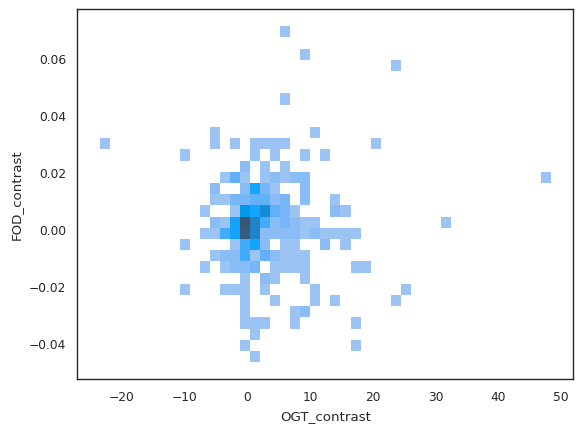

In [ ]:
sns.histplot(data=OGTvsFOD, x='OGT_contrast', y='FOD_contrast')
plt.show()

<Axes: xlabel='OGT_contrast', ylabel='FOD_contrast'>

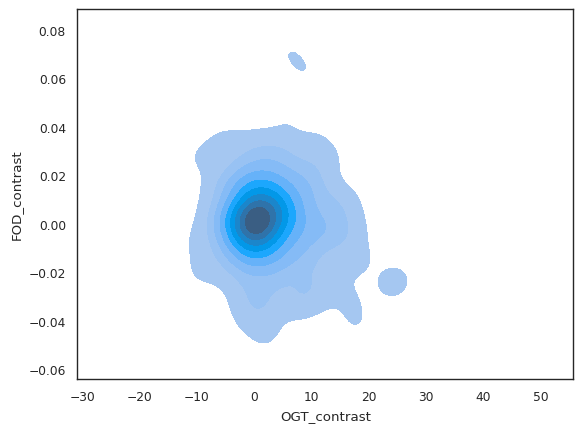

In [ ]:
sns.kdeplot(data=OGTvsFOD, x='OGT_contrast', y='FOD_contrast', fill=True)

<Axes: xlabel='OGT_contrast', ylabel='FOD_contrast'>

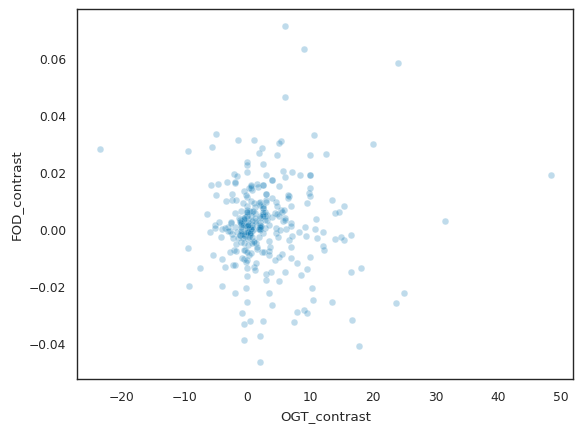

In [ ]:
sns.scatterplot(data=OGTvsFOD, x='OGT_contrast', y='FOD_contrast', alpha=0.25)

In [ ]:
OGTvsFOD_stats = scipy.stats.linregress(OGTvsFOD['OGT_contrast'], OGTvsFOD['FOD_contrast'])
OGTvsFOD_stats, OGTvsFOD_stats.rvalue**2

(LinregressResult(slope=-1.0672715514517473e-05, intercept=0.0016655289710560922, rvalue=-0.0045130203651971654, pvalue=0.9370242390411343, stderr=0.00013496899979209402, intercept_stderr=0.0009373171210907114),
 2.0367352816684356e-05)

Seems like when phylogeny is controlled for, there is no relationship between OGT and FOD

In [ ]:
df = pd.DataFrame({'X':OGTvsFOD['OGT_contrast'],
                  'Y':OGTvsFOD['FOD_contrast']})

num_iterations = 10000
observed_corr, _ = scipy.stats.spearmanr(df['X'], df['Y'])

# Initialize an array to store resampled correlations
resampled_correlations = []

# Perform permutation testing (resampling)
for i in range(num_iterations):
    permuted_Y = np.random.permutation(df['Y'])  # Permute the Y values
    resampled_corr, _ = scipy.stats.spearmanr(df['X'], permuted_Y)
    resampled_correlations.append(resampled_corr)

# Calculate the p-value based on the resampled correlations
p_value = (np.abs(resampled_correlations) >= np.abs(observed_corr)).mean()
print("p-value:", p_value)

p-value: 0.6251


In [ ]:
X = OGTvsFOD['OGT_contrast']
y = OGTvsFOD['FOD_contrast']

linear_model = sm.OLS(y, X).fit()

In [ ]:
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:           FOD_contrast   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.4751
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                       0.491
Time:                        00:26:39   Log-Likelihood:                          856.76
No. Observations:                 309   AIC:                                     -1712.
Df Residuals:                     308   BIC:                                     -1708.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

<Axes: xlabel='OGT_contrast', ylabel='FOD_contrast'>

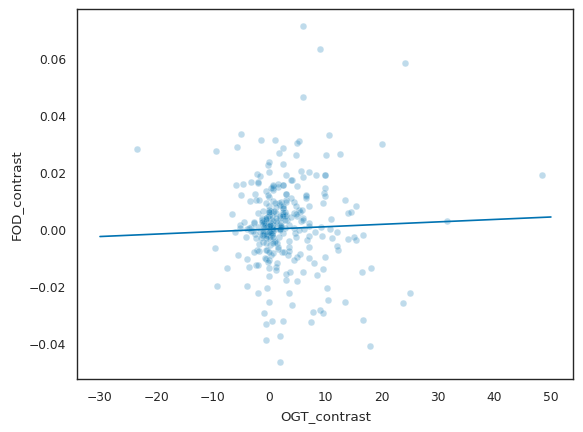

In [ ]:
predictions = linear_model.predict([-30, 50])
sns.scatterplot(data=OGTvsFOD, x='OGT_contrast', y='FOD_contrast', alpha=0.25)
sns.lineplot(x=[-30, 50], y=predictions)

In [ ]:
polynomial_model = sm.OLS(y, X**2).fit()
print(polynomial_model.summary())

                                 OLS Regression Results                                
Dep. Variable:           FOD_contrast   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.139
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                       0.145
Time:                        00:27:03   Log-Likelihood:                          857.60
No. Observations:                 309   AIC:                                     -1713.
Df Residuals:                     308   BIC:                                     -1709.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

<Axes: xlabel='OGT_contrast', ylabel='FOD_contrast'>

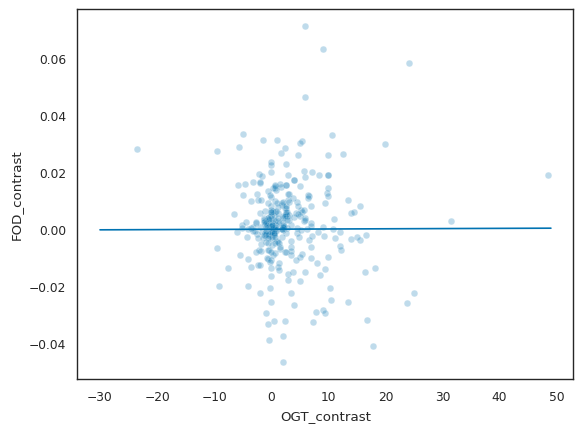

In [ ]:
predictions = polynomial_model.predict(np.arange(-30, 50))
sns.scatterplot(data=OGTvsFOD, x='OGT_contrast', y='FOD_contrast', alpha=0.25)
sns.lineplot(x=np.arange(-30, 50), y=predictions)

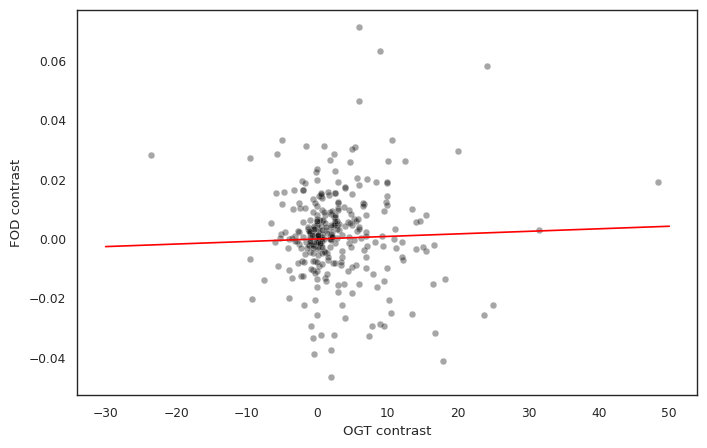

In [ ]:
predictions = linear_model.predict([-30, 50])

fig, ax = plt.subplots(figsize=(8, 5))

plt.ylabel('FOD contrast')
plt.xlabel('OGT contrast')
sns.scatterplot(data=OGTvsFOD, x='OGT_contrast', y='FOD_contrast', alpha=0.35, color='black')
sns.lineplot(x=[-30, 50], y=predictions, color='red')
plt.show()

In [ ]:
# fig.savefig('contrast.svg')